In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
from Luca import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

# n is the number density of Hydrogen molecules in the surrounding gas.


m_H = 1.67e-27  # Hydrogen mass in units of kg



def v_R(c_s_in):
    return  2 * c_s_in
def v_D(c_s_in):
    return  (c_s**2)/(2 * c_s_in)


def ρ(n):
    return m_H * n

def Δ(v_BH, c_s_in):
    return ((v_BH**2 + c_s**2)**2) - (4 * (v_BH**2) * (c_s_in**2)) 
def ρ_in_plus(v_BH, c_s_in):
    return  ρ(n) * ((v_BH**2 + c_s**2 + np.sqrt(Δ(v_BH, c_s_in)))/(2 * c_s_in**2))
def ρ_in_minus(v_BH, c_s_in):
    return ρ(n) * ((v_BH**2 + c_s**2 - np.sqrt(Δ(v_BH, c_s_in)))/(2 * c_s_in**2))
def ρ_in_0(v_BH, c_s_in):
    return ρ(n) * ((v_BH**2 + c_s**2)/(2 * c_s_in**2))

    

def M_dot_PR(M, v_BH, c_s_in):
    
    def ρ_in(v_BH, c_s_in):
        if v_BH <= v_D(c_s_in):
            return ρ_in_plus(v_BH, c_s_in)
        elif v_D(c_s_in) < v_BH < v_R(c_s_in):
            return ρ_in_0(v_BH, c_s_in)
        else:
            return ρ_in_minus(v_BH, c_s_in)
    
    def v_in(v_BH, c_s_in):
        if v_BH <= v_D(c_s_in):
            return (ρ(n)/ρ_in(v_BH, c_s_in)) * v_BH
        elif v_D(c_s_in) < v_BH < v_R(c_s_in):
            return c_s_in
        else:
            return (ρ(n)/ρ_in(v_BH, c_s_in)) * v_BH
    
    return (4 * np.pi  * ((G * M)**2) * ρ_in(v_BH, c_s_in))/((v_in(v_BH, c_s_in)**2 + c_s_in**2)**(3/2))



def M_dot_BHL(M, v_BH, λ):
    return (4 * np.pi * λ * ((G * M)**2) * ρ(n))/((v_BH**2 + c_s**2)**(3/2))

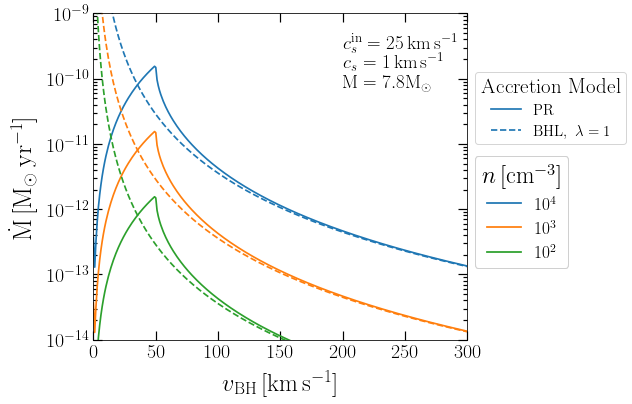

In [3]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



n_arr = np.array([1e4, 1e3, 1e2]) #in units of cm⁻³
v_BH_arr = np.linspace(0, 1e4, 10000) #in units of kms⁻¹
M_dot_PR_arr = np.zeros(len(v_BH_arr))
M_dot_BHL_arr = np.zeros(len(v_BH_arr))


G = 6.67e-11
c_s = 1e3      # in units of ms⁻¹
λ = 1

c_s_in = 25e3  # in units of ms⁻¹
M = 7.8 * M_solar     # in units of kg 


for i, (n, color) in enumerate(zip(n_arr, colors)):
    n*= 1e6
    for j, v_BH in enumerate(v_BH_arr):
        v_BH*= 1e3 
        M_dot_PR_arr[j]  = M_dot_PR(M, v_BH, c_s_in) * (yr/M_solar)
        M_dot_BHL_arr[j] = M_dot_BHL(M, v_BH, λ) * (yr/M_solar)
        
    ax.plot(v_BH_arr, M_dot_PR_arr, color = color)
    ax.plot(v_BH_arr, M_dot_BHL_arr, color = color, ls = '--')
    

plt.xscale('linear')
plt.yscale('log')
plt.xlim(0, 300)
plt.ylim(1e-14, 1e-9)


plt.text(200, 3e-10, '$c_{s}^{\mathrm{in}} = 25 \, \mathrm{km\, s^{-1}}$', fontsize = 19)
plt.text(200, 1.5e-10, '$c_{s} = 1 \, \mathrm{km\, s^{-1}}$', fontsize = 19)
plt.text(200, 7.3e-11, '$\mathrm{M} = 7.8 \mathrm{M_{\odot}}$', fontsize = 19)



plt.xlabel('$v_\mathrm{BH}\, \mathrm{[km\, s^{-1}]}$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{\dot M \, [M_{\odot}\, yr^{-1}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["PR", "BHL, $\, \lambda = 1$"], title = 'Accretion Model',
        title_fontsize = 21, loc = (1.02, 0.6), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4]], [ '$10^{4}$' ,  '$10^{3}$', '$10^{2}$'],
           title = '$n \, \mathrm{[cm^{-3}]}$', title_fontsize = 24, loc = (1.02, 0.22), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('M_dot_diff_n.pdf', bbox_inches = 'tight')
plt.show()

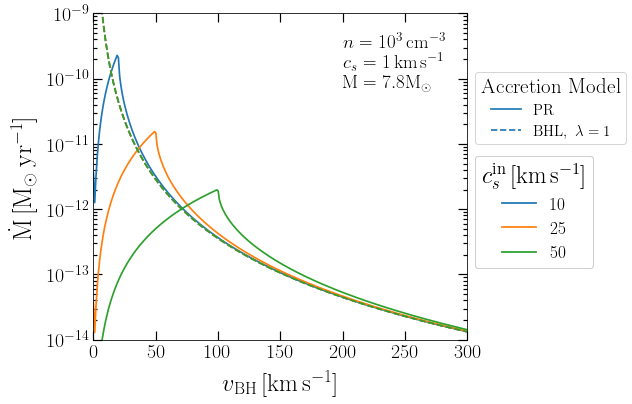

In [4]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



c_s_in_arr = np.array([10, 25, 50]) #in units of cm⁻³
v_BH_arr = np.linspace(0, 1e4, 10000) #in units of kms⁻¹
M_dot_PR_arr = np.zeros(len(v_BH_arr))
M_dot_BHL_arr = np.zeros(len(v_BH_arr))


G = 6.67e-11
c_s = 1e3      # in units of ms⁻¹
λ = 1


n = 1e3 * 1e6  #in units of m⁻³
M = 7.8 * M_solar     # in units of kg 


for i, (c_s_in, color) in enumerate(zip(c_s_in_arr, colors)):
    c_s_in*= 1e3
    for j, v_BH in enumerate(v_BH_arr):
        v_BH*= 1e3 
        M_dot_PR_arr[j]  = M_dot_PR(M, v_BH, c_s_in) * (yr/M_solar)
        M_dot_BHL_arr[j] = M_dot_BHL(M, v_BH, λ) * (yr/M_solar)
        
    ax.plot(v_BH_arr, M_dot_PR_arr, color = color)
    ax.plot(v_BH_arr, M_dot_BHL_arr, color = color, ls = '--')
    

plt.xscale('linear')
plt.yscale('log')
plt.xlim(0, 300)
plt.ylim(1e-14, 1e-9)


plt.text(200, 3e-10, '$n  = 10^{3} \, \mathrm{cm^{-3}}$', fontsize = 19)
plt.text(200, 1.5e-10, '$c_{s} = 1 \, \mathrm{km\, s^{-1}}$', fontsize = 19)
plt.text(200, 7.3e-11, '$\mathrm{M} = 7.8 \mathrm{M_{\odot}}$', fontsize = 19)



plt.xlabel('$v_\mathrm{BH}\, \mathrm{[km\, s^{-1}]}$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{\dot M \, [M_{\odot}\, yr^{-1}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["PR", "BHL, $\, \lambda = 1$"], title = 'Accretion Model',
        title_fontsize = 21, loc = (1.02, 0.6), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4]], [ '$10$' ,  '$25$', '$50$'],
           title = '$c_{s}^\mathrm{in} \, \mathrm{[km\,s^{-1}]}$', title_fontsize = 24, loc = (1.02, 0.22), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('M_dot_diff_cs_in.pdf', bbox_inches = 'tight')
plt.show()

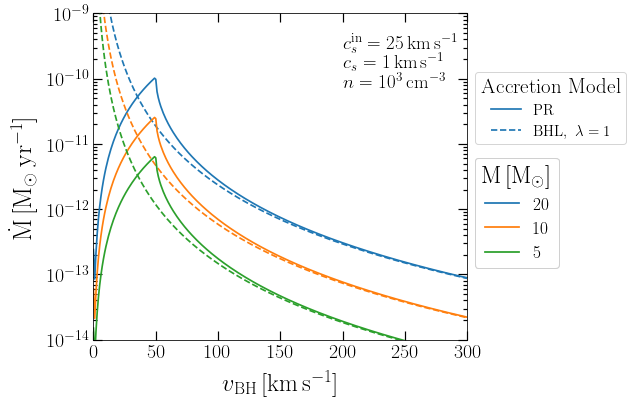

In [5]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



M_arr = np.array([20, 10, 5]) #in units of M_solar
v_BH_arr = np.linspace(0, 1e4, 10000) #in units of kms⁻¹
M_dot_PR_arr = np.zeros(len(v_BH_arr))
M_dot_BHL_arr = np.zeros(len(v_BH_arr))


G = 6.67e-11
c_s = 1e3      # in units of ms⁻¹
λ = 1


n = 1e3 * 1e6  #in units of m⁻³
c_s_in = 25e3  # in units of ms⁻¹


for i, (M, color) in enumerate(zip(M_arr, colors)):
    M*= M_solar
    for j, v_BH in enumerate(v_BH_arr):
        v_BH*= 1e3 
        M_dot_PR_arr[j]  = M_dot_PR(M, v_BH, c_s_in) * (yr/M_solar)
        M_dot_BHL_arr[j] = M_dot_BHL(M, v_BH, λ) * (yr/M_solar)
        
    ax.plot(v_BH_arr, M_dot_PR_arr, color = color)
    ax.plot(v_BH_arr, M_dot_BHL_arr, color = color, ls = '--')
    

plt.xscale('linear')
plt.yscale('log')
plt.xlim(0, 300)
plt.ylim(1e-14, 1e-9)


plt.text(200, 3e-10, '$c_{s}^{\mathrm{in}} = 25 \, \mathrm{km\, s^{-1}}$', fontsize = 19)
plt.text(200, 1.5e-10, '$c_{s} = 1 \, \mathrm{km\, s^{-1}}$', fontsize = 19)
plt.text(200, 7.3e-11, '$n  = 10^{3} \, \mathrm{cm^{-3}}$', fontsize = 19)


plt.xlabel('$v_\mathrm{BH}\, \mathrm{[km\, s^{-1}]}$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{\dot M \, [M_{\odot}\, yr^{-1}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["PR", "BHL, $\,\lambda = 1$ "], title = 'Accretion Model',
        title_fontsize = 21, loc = (1.02, 0.6), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4]], [ '$20$' ,  '$10$', '$5$'],
           title = '$\mathrm{M} \, \mathrm{[M_{\odot}]}$', title_fontsize = 24, loc = (1.02, 0.22), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('M_dot_diff_M.pdf', bbox_inches = 'tight')
plt.show()